<a href="https://colab.research.google.com/github/MbusoMthimkhul/firstpackage/blob/master/ClassificationHackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import TreebankWordTokenizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

In [0]:
sample_sub = pd.read_csv('sample_submission.csv')

In [141]:
sample_sub.head()

,TransactionId,FraudResult
0,TransactionId_50600,NaN
1,TransactionId_95109,NaN
2,TransactionId_47357,NaN
3,TransactionId_28185,NaN
4,TransactionId_22140,NaN


In [0]:
train = pd.read_csv('training.csv')

In [143]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


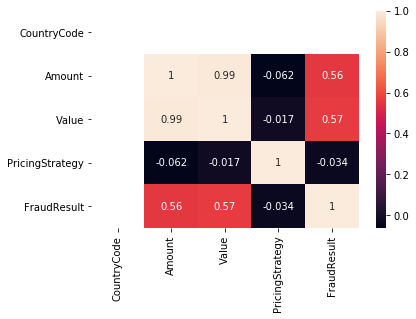

In [144]:
sns.heatmap(train.corr(), annot = True)

In [0]:
test = pd.read_csv('test.csv')

In [146]:
test.shape

(45019, 15)

In [147]:
test = test.drop(['PricingStrategy', 'CurrencyCode', 'CountryCode', 'TransactionStartTime'], axis=1)
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60


In [0]:
y = train[ 'FraudResult']#].set_index('TransactionId')

In [149]:
# number of elements in y that are non zero
a = []
for i in y:
  if i != 0:
    a.append(i)
    
len(a)

193

In [0]:
X = train.loc[:, train.columns != 'FraudResult']
X = X.drop('PricingStrategy', axis =1)

In [151]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: FraudResult, dtype: int64

In [152]:
X.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z


In [0]:
#check sets that contain missing data
contains_missing_values_train = list(X.isna().sum()[X.isna().sum() != 0].index)
contains_missing_values_test = list(test.isna().sum()[test.isna().sum() != 0].index)


In [154]:
contains_missing_values_train, contains_missing_values_test

([], [])

In [155]:
# number of element in CountryCode that are not 356
a = []
for i in X['CountryCode']:
  if i != 256:
    a.append(i)
    
len(a)

0

In [156]:
# number of element in CurrencyCode that are not UGX
a = []
for i in X['CurrencyCode']:
  if i != 'UGX':
    a.append(i)
    
len(a)

0

In [0]:
X = X.drop(['CurrencyCode', 'CountryCode', 'TransactionStartTime'], axis=1)

In [158]:
X.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644


In [159]:
contains_missing_values_train

[]

In [160]:
contains_missing_values_test

[]

In [0]:
one_hot_list_train = [a for a in X.columns if X[a].dtype == 'object']
one_hot_list_test = [a for a in test.columns if test[a].dtype == 'object']

In [162]:
one_hot_list_train

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId']

In [163]:
one_hot_list_test

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId']

In [0]:
X1 = X.iloc[:10000,:]

In [165]:
X1.shape

(10000, 11)

In [0]:
#X1 = pd.get_dummies(X1, columns = one_hot_list_train, prefix = one_hot_list_train, drop_first = True)

In [0]:
#X2 = X.iloc[30000:60000,:]

In [0]:
#X2 = pd.get_dummies(X2, columns = one_hot_list_train, prefix = one_hot_list_train, drop_first = True)

In [0]:
#X3 =  X.iloc[60000:, :]

In [0]:
#X3 = pd.get_dummies(X3, columns = one_hot_list_train, prefix = one_hot_list_train, drop_first = True)

In [0]:
test1 =test.iloc[:3000,:]

In [172]:
test1.shape

(3000, 11)

In [0]:
combined = pd.concat([X1, test1])

In [0]:
combined = pd.get_dummies(combined, columns = one_hot_list_train, prefix = one_hot_list_train, drop_first = True)

In [0]:
#test2 =test.iloc[13000:26000,:]

In [0]:
#test2 = pd.get_dummies(test2, columns = one_hot_list_train, prefix = one_hot_list_train, drop_first = True)

In [0]:
#test3 =test.iloc[26000:,:]

In [0]:
#test3 = pd.get_dummies(test3, columns = one_hot_list_train, prefix = one_hot_list_train, drop_first = True)

In [0]:
y1_train = y.iloc[:10000]

X1_train = combined.iloc[:10000,:]
X1_test = combined.iloc[10000:,:]

#y2_train = y.iloc[30000:60000,:]

#X2_train = X2
#X2_test = test2

#y3_train = y.iloc[60000:,:]

#X3_train = X3
#X3_test = test3

In [0]:
lr = LogisticRegression()
rf = RandomForestClassifier()
sv = svm.SVC(probability=True)
adb = AdaBoostClassifier()
knn = KNeighborsClassifier()

In [181]:
lr.fit(X1_train,y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred1 = lr.predict(X1_test)

In [183]:
pred1.shape

(3000,)

In [0]:
submission = pd.DataFrame({'TransactionId': test1.TransactionId.values, 'FraudResult': pred1})

In [186]:
submission.head()

,TransactionId,FraudResult
0,TransactionId_50600,0
1,TransactionId_95109,0
2,TransactionId_47357,0
3,TransactionId_28185,0
4,TransactionId_22140,0


In [0]:
submission.to_csv('submission.csv', index=False)